In [48]:
import lxml
import pandas as pd
import matplotlib.pyplot as plt
import re
dfs = pd.read_html(r'https://en.wikipedia.org/wiki/Aviation_safety',index_col=0)
data = dfs[1]
data.columns = ['DPB Journeys','DPB Hrs','DPB kms']

**Alternative way**
import pandas as pd
import requests as re
from bs4 import BeautifulSoup
url = 'https://en.wikipedia.org/wiki/Aviation_safety'
r = re.get(url)
soup = BeautifulSoup(r.text,"html.parser")
my_table = soup.find('table',{'class':'wikitable sortable'})
tr = my_table.find_all('tr')
for r in tr:
    td = r.find_all('td')
    data = [i.text for i in td]
    print(data)

In [30]:
data

,DPB Journeys,DPB Hrs,DPB kms
Bus,4.3,11.1,0.40
Rail,20,30,0.60
Van,20,60,1.20
Car,40,130,3.10
Foot,40,220,54.20
Water,90,50,2.60
Air,117,30.8,0.05
Pedal cycle,170,550,44.60
Paragliding,NaN,970[10],NaN
Skydiving,7500[11],75000[12],NaN


In [29]:
#null value handling - drop rows with NaN
edited_data = data.dropna()

In [31]:
#removing hyperlink text from entire data
columns = edited_data.columns[:-1]
index_list = []
for col in columns:
    for y in edited_data[col]:
        y = re.split('\[',y)[0]
for i in edited_data.index:
    edited_data.rename(index={i:re.split('\[',i)[0]},inplace=True)

In [32]:
#changing data types string to float
edited_data['DPB Journeys'] = pd.to_numeric(edited_data['DPB Journeys'])
edited_data['DPB Hrs'] = pd.to_numeric(edited_data['DPB Hrs'])

c:\users\kalya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\kalya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
edited_data

,DPB Journeys,DPB Hrs,DPB kms
Bus,4.3,11.1,0.40
Rail,20.0,30.0,0.60
Van,20.0,60.0,1.20
Car,40.0,130.0,3.10
Foot,40.0,220.0,54.20
Water,90.0,50.0,2.60
Air,117.0,30.8,0.05
Pedal cycle,170.0,550.0,44.60
Motorcycle,1640.0,4840.0,108.90
Space Shuttle,17000000.0,70000.0,6.60


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000012F7FE212B0>,
      dtype=object)

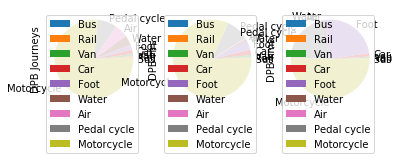

In [36]:
edited_data[:-1].plot.pie(subplots=True)

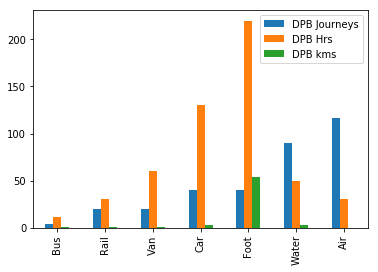

In [42]:
edited_data[:-3].plot.bar()

Text(0.5, 1.0, 'Aviation Safety Statistics: Transport comparisons\nThere are three main ways in which risk of fatality of a certain mode of travel is measured\n')

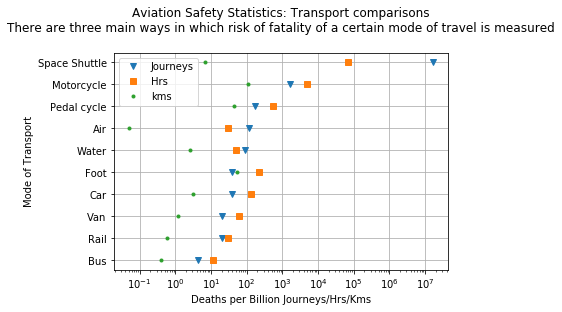

In [156]:
i=edited_data.index
x=edited_data['DPB Journeys']
y=edited_data['DPB Hrs']
z=edited_data['DPB kms']
plt.xscale('log')
fig = plt.plot(x, i, 'v', label = 'Journeys')
plt.plot(y, i, 's', label = 'Hrs')
plt.plot(z, i, '.', label = 'kms')
plt.grid(True)
plt.legend() # contents of label would be displayed as legend
plt.xlabel('Deaths per Billion Journeys/Hrs/Kms')
plt.ylabel('Mode of Transport')
plt.title('Aviation Safety Statistics: Transport comparisons\nThere are three main ways in which risk of fatality of a certain mode of travel is measured\n')

Text(0.5, 1.0, 'Aviation Safety Statistics: Transport comparisons\nThere are three main ways in which risk of fatality of a certain mode of travel is measured\n')

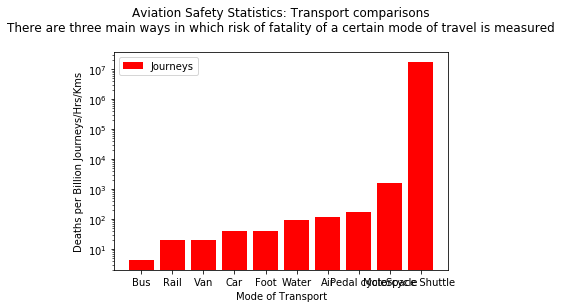

In [180]:
i=edited_data.index
x=edited_data['DPB Journeys']
y=edited_data['DPB Hrs']
z=edited_data['DPB kms']
plt.bar(i, x, label = 'Journeys', color = 'r')
#plt.bar(i, y, label = 'Hrs', color = 'b')
#plt.bar(i, z, label = 'kms', color = 'c')
plt.yscale('log')
plt.legend() # contents of label would be displayed as legend
plt.ylabel('Deaths per Billion Journeys/Hrs/Kms')
plt.xlabel('Mode of Transport')
plt.title('Aviation Safety Statistics: Transport comparisons\nThere are three main ways in which risk of fatality of a certain mode of travel is measured\n')